**Flipkart Reviews Sentiment Analysis using Python**

Sentiment analysis is a NLP task used to determine the sentiment behind textual data. In context of product reviews it helps in understanding whether the feedback given by customers is positive, negative or neutral. It helps businesses gain valuable insights about customer experiences, product quality and brand perception. It helps in improving product quality and refining customer service strategies.


**1. Importing libraries**


In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

Files_path = '/content/flipkart_data.csv'
df = pd.read_csv(Files_path)

df.head()


,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


**2. Preprocessing the Data**

The next step is preprocessing the data which involves cleaning the review text and preparing the sentiment labels. We'll start by converting the reviews to lowercase and removing stopwords to make text more manageable. Then we will convert ratings (from 1 to 5) into binary sentiment labels like 1 for positive reviews (ratings 4 and 5) and 0 for negative reviews (ratings 3 and below).

In [3]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_reviews_stopwords(df):
    df['review'] = df['review'].str.lower()
    df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)
    return df

df_cleaned = preprocess_reviews_stopwords(df)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**3. Visualizing the Data**

Before we proceed with model making it's important to explore the dataset. We can visualize the distribution of sentiment labels and analyze the frequency of words in positive reviews.

**Sentiment Distribution**

To understand the overall sentiment distribution, we will use a bar plot to visualize the counts of positive and negative reviews.

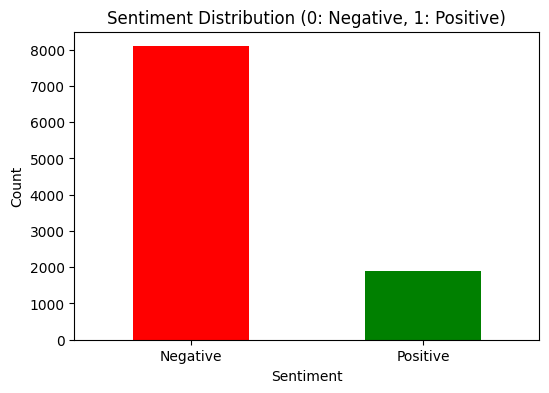

In [4]:
sentiment_counts = df_cleaned['sentiment'].value_counts()
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Sentiment Distribution (0: Negative, 1: Positive)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
plt.show()

**Word Cloud for Positive Reviews**

we'll create a wordclud to visualise the most frequent words in positve reviews. this can help us understand the common thems in customer feedback.

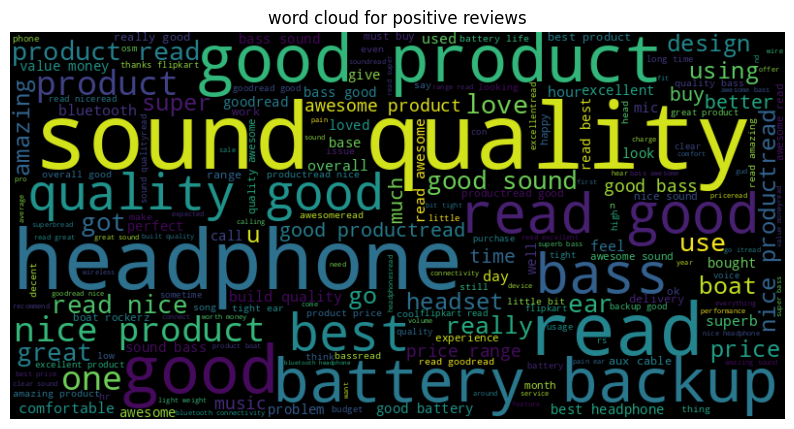

In [7]:
positive_reviews = df_cleaned[df_cleaned['sentiment'] == 1]['review']
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400).generate(positive_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('word cloud for positive reviews')
plt.show()

4. Vectorizing the Text Data

Machine learning models require numerical input so we need to convert the textual reviews into numerical vectors. We will use TF-IDF (Term Frequency-Inverse Document Frequency) which helps converting these texts into vectors.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_cleaned['review'])
y =  df_cleaned['sentiment']

5. Model Training, Evaluation and Prediction

Now that the data is prepared we can split it into training and testing sets where 80% data is used for training and rest is used for testing. We will train a Decision Tree Classifier on the training data and evaluate its performance on the test data. We will also measure the model's accuracy and generate a confusion matrix to analyze the predictions.

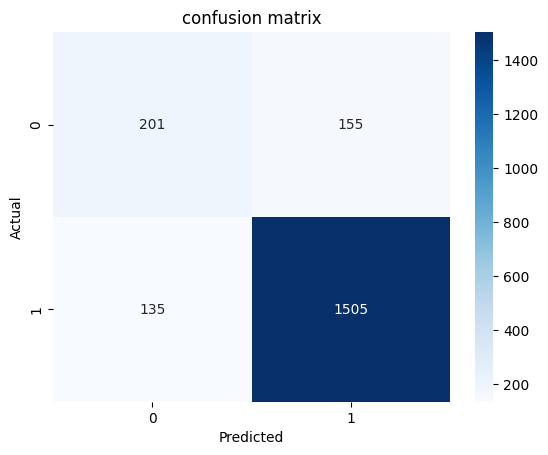

0.8547094188376754


In [13]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix , annot=True, fmt='d',cmap = "Blues")
plt.title('confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(accuracy)


We are able to classify reviews as positive or negative with an accuracy of approximately 86% which is great for a machine learning model but we can further fine tune this model to get better accuracy for more complex task. With this businesses can gain valuable insights into customer satisfaction and make data-driven decisions to improve their products and services.